In [1]:
## Bring in needed mods
import pandas as pd, numpy as np

#, glob, sys, os, seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#sys.path.insert(0, '/home/croth/QTL-functions/SCRIPTS/')
#import qtlfunctions as qtlfun

In [2]:
## Set path to data of newest progeny sequenced
path2 = '../PHENOTYPE/RAW/202105_Samples_for_Illumina_ForCullen.xlsx'

## Load ind ataframe of newest set
df2 = pd.read_excel(path2)

## Drop columns we don't need for QTL analysis
df2.drop(['Notes','Sample ID','ID','Species'],
         inplace=True,axis=1)

## Add a basidum column
df2['Basidium'] = np.nan

## Rename columns
df2.columns = ['Strain','Phenotype_Short','Basidium']

## View head
df2.head()

,Strain,Phenotype_Short,Basidium
0,NIH12,N,NaN
1,NIH433,N,NaN
2,I641,N,NaN
3,I643,N,NaN
4,I645,N,NaN


In [3]:
## Set path to data 
path1 = '../PHENOTYPE/RAW/202011_WGS_B3502Progeny_for_QTL.xlsx'

## load in dataframe of original set
df1 = pd.read_excel(path1)

## Drop columns we don't need for QTL analysis
df1.drop(['Notes','Cross_Progeny'],axis=1,inplace=True)

## rename columns
df1.columns = ['Strain','Basidium','Phenotype_Short']

## View tail
df1.tail()

,Strain,Basidium,Phenotype_Short
52,B_09,NaN,N
53,B_10,NaN,N
54,B_11,NaN,T
55,B_12,NaN,N
56,B_20 **,NaN,Y


In [4]:
## concatinate data
df = pd.concat([df1,df2])

## Edit strainame B_20
df.loc[(df.Strain=='B_20 **'),'Strain'] = 'B_20'

## Check unique number of smaples
assert df.Strain.unique().shape[0] == df.shape[0]

## Print shape
df.shape

(82, 3)

In [5]:
## Print the unique phenotypes
df.Phenotype_Short.unique()

array(['N', 'Y', 'L', 'N (with rare spots of T)', 'T'], dtype=object)

In [6]:
## Set filamentous notes based on phenotypes above
fillnotes = ['Yeast','Filamentous','Giant Cells',
             'Non-filamentous with rare hyper-filamentous',
             'Hyper-filamentous']

## Make a dictionary for filamentous phenoytpe
filldict = dict(zip(df.Phenotype_Short.unique(),fillnotes))

## Add a phenotype description
df['Phenotype_Description'] = df.Phenotype_Short.replace(filldict)

## VIew head
df.head()

,Strain,Basidium,Phenotype_Short,Phenotype_Description
0,A_01,1.0,N,Yeast
1,A_02,1.0,Y,Filamentous
2,A_03,1.0,N,Yeast
3,A_04,1.0,L,Giant Cells
4,A_05,2.0,N (with rare spots of T),Non-filamentous with rare hyper-filamentous


In [7]:
## Count phenotypes
pheno_count = df.groupby(df.Phenotype_Description).count().sort_values('Strain')

## Set xlables
xlabels = []

## Iterate thru index
for x in pheno_count.index:
    
    ## Split if with is in phenotype name
    if len(x.split(" with")) > 1:
        
        ## Split
        nx = '\nwith'.join(x.split(' with'))
    
    else:
        
        ## Don't split
        nx = x
        
    ## append x
    xlabels.append(nx)

## Print counts
pheno_count

,Strain,Basidium,Phenotype_Short
Phenotype_Description,,,
Non-filamentous with rare hyper-filamentous,4,1,4
Hyper-filamentous,7,4,7
Filamentous,13,11,13
Giant Cells,20,8,20
Yeast,38,20,38


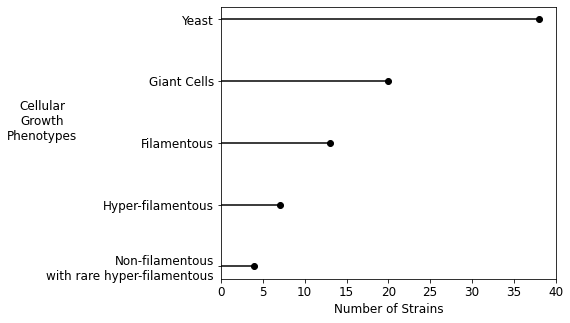

In [8]:
## Draw figure of phenotype
## call figure and set face-color
fig,ax = plt.subplots(1,1,figsize=(6,5))
fig.set_facecolor('w')

## Set plot varialbes
color = 'k'
fontsize = 12
ymax = 40

## Plot distribution of phenotypes
plt.plot(pheno_count.Strain.values,range(pheno_count.shape[0]),'o',color=color);

plt.hlines(range(len(fillnotes)),np.zeros(len(fillnotes)),
           pheno_count.Strain.values,color=color);

## Modify y-axis
plt.xlabel('Number of Strains',fontsize=fontsize);
plt.xlim(0,ymax)
plt.xticks(fontsize=fontsize);

## Modify x-axis
plt.yticks(range(len(fillnotes)),xlabels,rotation=0,fontsize=fontsize)
plt.ylabel('Cellular\nGrowth\nPhenotypes',rotation=0,fontsize=fontsize);

In [9]:
## print phenotype description
fillnotes

['Yeast',
 'Filamentous',
 'Giant Cells',
 'Non-filamentous with rare hyper-filamentous',
 'Hyper-filamentous']

In [10]:
## Binary phenotype:
## Yeast, non-filamentous, and non-filamentous with rare ... 
## vs everything else; filamentous, hyper-filamentous,and giant cells 
binary_dict = dict(zip(fillnotes,[0,1,1,0,1]))
df['Binary'] = df.Phenotype_Description.replace(binary_dict)

## Trinary phenotype:
## Yeast, non-filamentous, and non-filamentous with rare ...  
## filamentous + hyper-filamentous
## and giant cells
trinary_dict = dict(zip(fillnotes,[0,1,2,0,1]))
df['Trinary'] = df.Phenotype_Description.replace(trinary_dict)

## Guadrary phenotype:
## Yeast / non-filamentous 
## Filamentous
## Hyper-filamentous + (non-filamentous with rare)
## Large Cells
quad_dict = dict(zip(fillnotes,[0,1,3,2,2]))
df['Quadrary'] = df.Phenotype_Description.replace(quad_dict)

## Full set of phenotypes
## The five descret phenotypic classes (as seen above)
five_dict = dict(zip(fillnotes,[0,1,3,2,4]))
df['Pentary'] = df.Phenotype_Description.replace(five_dict)

## View head
df.head()

,Strain,Basidium,Phenotype_Short,Phenotype_Description,Binary,Trinary,Quadrary,Pentary
0,A_01,1.0,N,Yeast,0,0,0,0
1,A_02,1.0,Y,Filamentous,1,1,1,1
2,A_03,1.0,N,Yeast,0,0,0,0
3,A_04,1.0,L,Giant Cells,1,2,3,3
4,A_05,2.0,N (with rare spots of T),Non-filamentous with rare hyper-filamentous,0,0,2,2


In [11]:
## Save dataframe
df.to_csv('../PHENOTYPE/PROCESSED/Cellsize_shape_phenotype.csv',index=False)